# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [121]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load='Resources/city_data.csv'
ride_data_to_load="Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [122]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [123]:
#  1. Get the total rides for each city type
count_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
count_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [124]:
# 2. Get the total drivers for each city type
sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [125]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [126]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_type=pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [127]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare_by_type=sum_fares_by_type/sum_drivers_by_type
avg_driver_fare_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [128]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame(
    {'total rides': count_rides_by_type,
     'total drivers':sum_drivers_by_type,
     'total fares':sum_fares_by_type,
     'average fare per ride':avg_fare_by_type,
     'average fare per driver':avg_driver_fare_by_type})
pyber_summary_df


,total rides,total drivers,total fares,average fare per ride,average fare per driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [129]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,total rides,total drivers,total fares,average fare per ride,average fare per driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [130]:
#  8. Format the columns.
pyber_summary_df["total fares"]=pyber_summary_df["total fares"].map("${:,.2f}".format)
pyber_summary_df["average fare per ride"]=pyber_summary_df["average fare per ride"].map("${:,.2f}".format)
pyber_summary_df['average fare per driver']=pyber_summary_df['average fare per driver'].map('${:,.2f}'.format)

pyber_summary_df

,total rides,total drivers,total fares,average fare per ride,average fare per driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [131]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [132]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_type_day = pyber_data_df.groupby(["date" , "type"]).sum()["fare"]
sum_fares_type_day  

date            type    
1/1/2019 0:08   Urban       37.91
1/1/2019 0:46   Suburban    47.74
1/1/2019 12:32  Suburban    25.56
1/1/2019 14:40  Urban        5.42
1/1/2019 14:42  Urban       12.31
                            ...  
5/8/2019 1:54   Urban       32.69
5/8/2019 2:31   Urban       41.33
5/8/2019 4:20   Urban       21.99
5/8/2019 4:39   Urban       18.45
5/8/2019 7:29   Urban       18.55
Name: fare, Length: 2364, dtype: float64

In [133]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fares_type_day=sum_fares_type_day.reset_index()
sum_fares_type_day

,date,type,fare
0,1/1/2019 0:08,Urban,37.91
1,1/1/2019 0:46,Suburban,47.74
2,1/1/2019 12:32,Suburban,25.56
3,1/1/2019 14:40,Urban,5.42
4,1/1/2019 14:42,Urban,12.31
...,...,...,...
2359,5/8/2019 1:54,Urban,32.69
2360,5/8/2019 2:31,Urban,41.33
2361,5/8/2019 4:20,Urban,21.99
2362,5/8/2019 4:39,Urban,18.45


In [134]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_table=pd.pivot_table(sum_fares_type_day,values="fare", index="date", columns="type")
pyber_pivot_table.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [135]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
loc_pyber_pivot_table=pyber_pivot_table.loc['1/1/2019':'29/4/2019']
loc_pyber_pivot_table.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [136]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
loc_pyber_pivot_table.index=pd.to_datetime(loc_pyber_pivot_table.index)

In [137]:
# 7. Check that the datatype for the index is datetime using df.info()
loc_pyber_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1074 entries, 2019-01-01 00:08:00 to 2019-02-09 06:55:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     53 non-null     float64
 1   Suburban  289 non-null    float64
 2   Urban     732 non-null    float64
dtypes: float64(3)
memory usage: 33.6 KB


In [138]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
loc_pyber_pivot_table_resample=loc_pyber_pivot_table.resample("W").sum()
loc_pyber_pivot_table_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-06 to 2019-03-03
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     9 non-null      float64
 1   Suburban  9 non-null      float64
 2   Urban     9 non-null      float64
dtypes: float64(3)
memory usage: 288.0 bytes


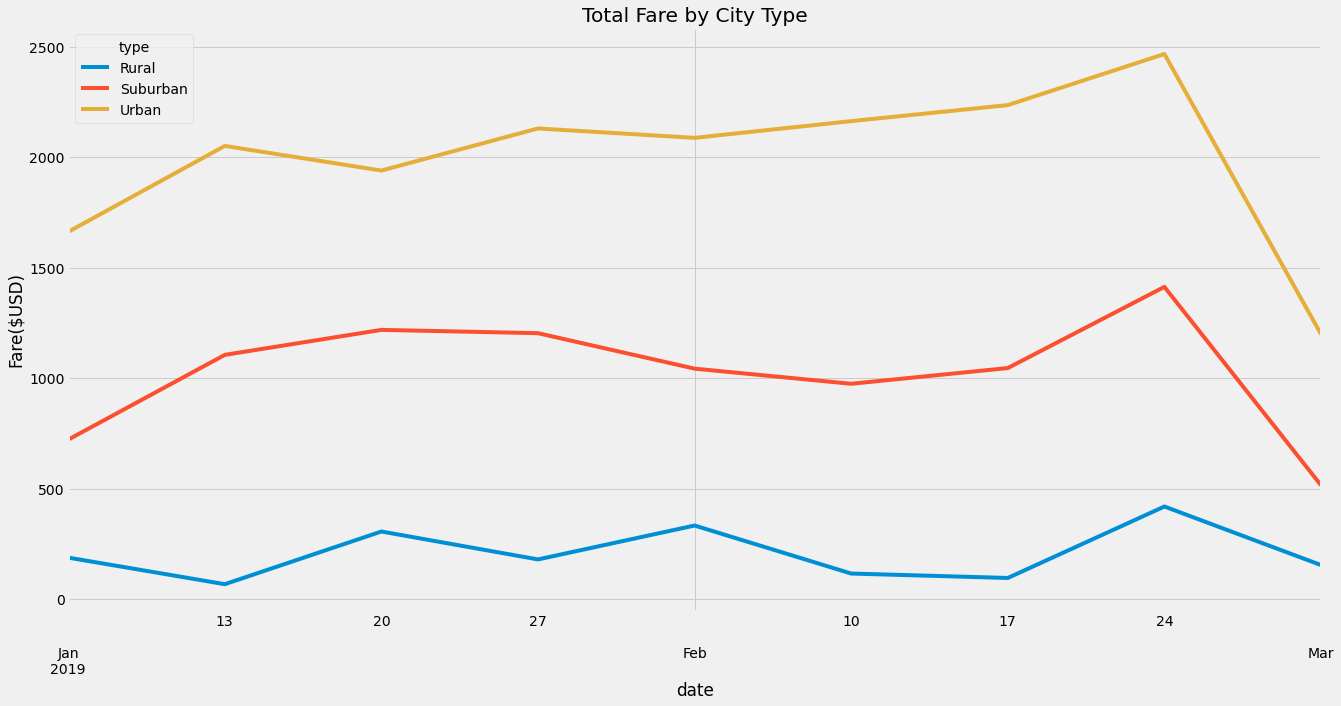

In [139]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

loc_pyber_pivot_table_resample.plot(figsize=(20,10))
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")

#save figure
plt.savefig("analysis/pyber_fare_sammary.png")
